In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np
#np.seterr(over='ignore')
import scipy as sp

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import aplpy
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

from pycupid import *

from sklearn.cluster import DBSCAN

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"


# function to visualize points clusters
def points_clusters(data, points, labels, wcs=None):
    x_scale = data.shape[0]-1
    y_scale = data.shape[1]-1
    fig = plt.figure(figsize=(10,10))
    if wcs is not None: fig.gca(projection=wcs)
    plt.imshow(data, cmap=plt.cm.gray_r)

    colors = plt.cm.gist_rainbow(np.linspace(0., 1., np.max(labels)+2))

    for i,label in enumerate(range(-1, np.max(labels)+1)):
        _points = points[labels==label]
        plt.scatter(_points[:,1]*y_scale, _points[:,0]*x_scale, s=20, 
                facecolor=colors[i], lw=0, alpha=0.9, label="{0}-th cluster".format(label))
    plt.legend(loc="best", prop={'size': 10})  
    plt.grid()
    ax = plt.gca()
    ax.invert_yaxis()
    if wcs is not None:
        plt.xlabel(umap[wcs.axis_type_names[0]])
        plt.ylabel(umap[wcs.axis_type_names[1]])
    plt.show()

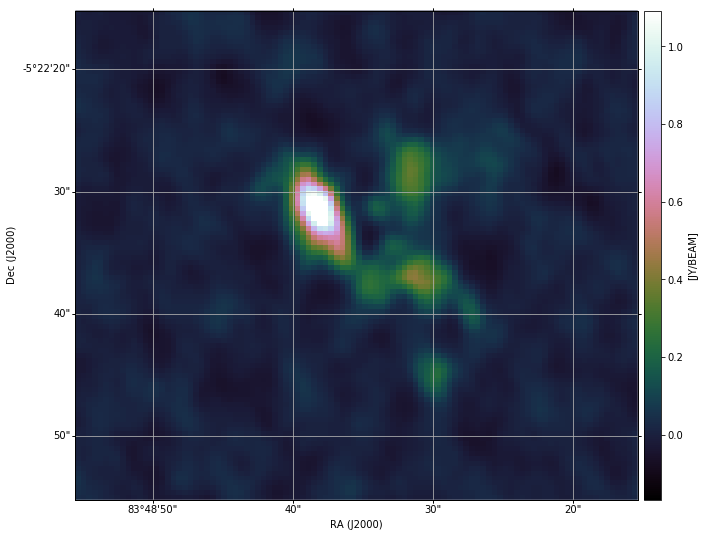

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'

data, wcs, hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

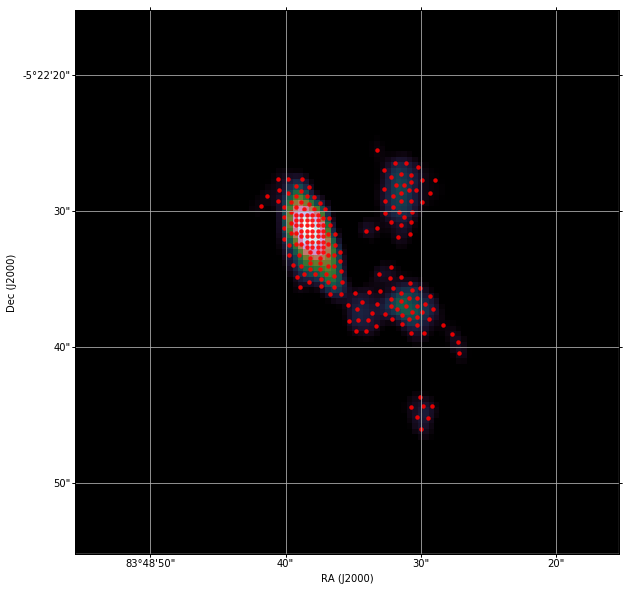

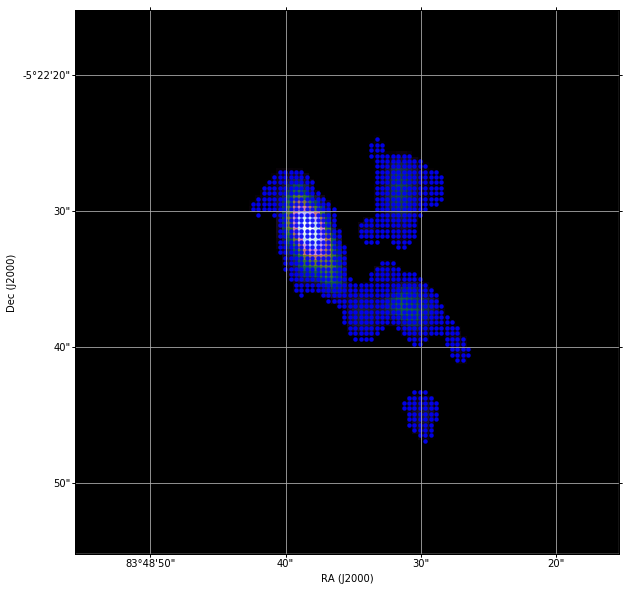

In [3]:
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=True, n_center=200, kappa=5.)

In [4]:
db = DBSCAN(eps=0.04, min_samples=5, n_jobs=-1)
points = np.vstack([hdmc.xc, hdmc.yc]).T
db.fit(points)

DBSCAN(algorithm='auto', eps=0.04, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=-1, p=None)

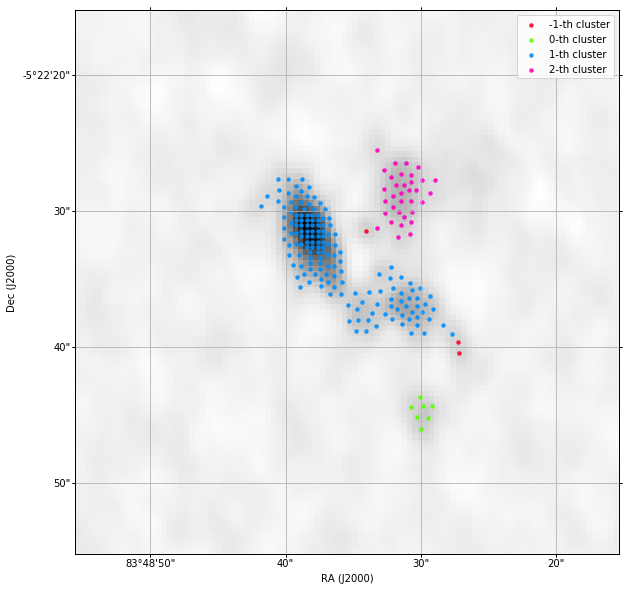

In [5]:
points_clusters(data, points, db.labels_, wcs=wcs)

***
***

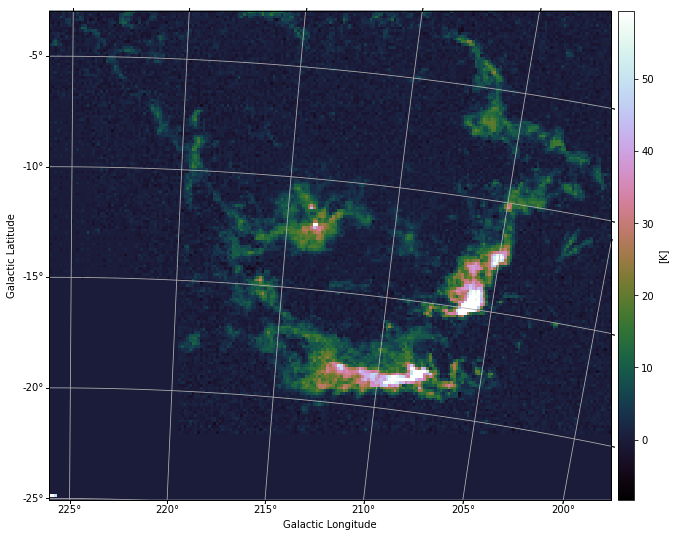

In [9]:
fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data, wcs, hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

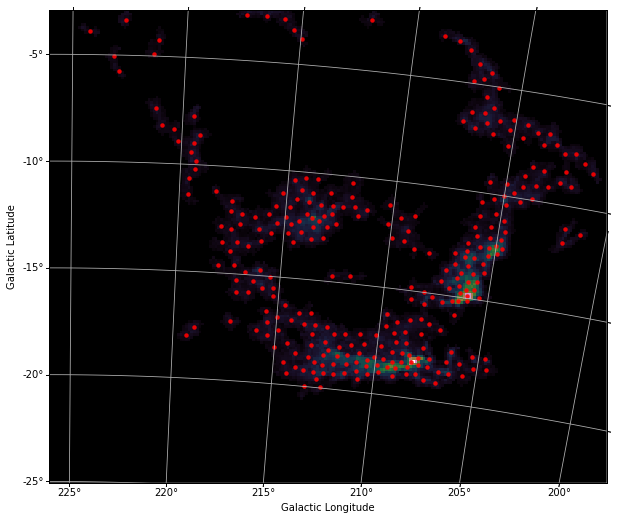

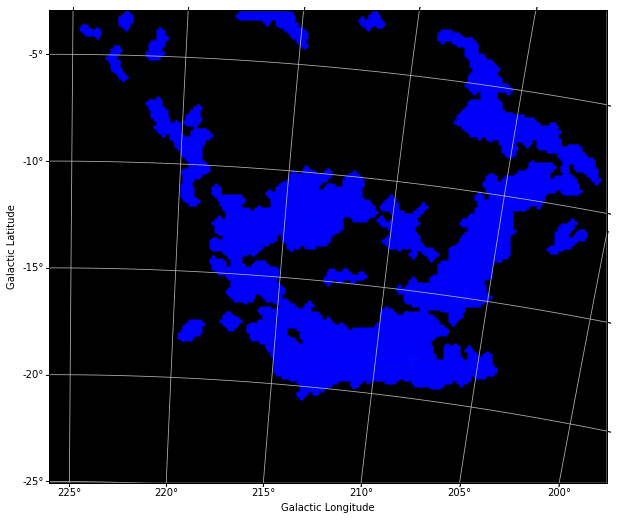

In [11]:
hdmc = HDMClouds(data, back_level=1.00798, wcs=wcs, verbose=True, n_center=300, kappa=5.)

In [13]:
hdmc.build_gmr()

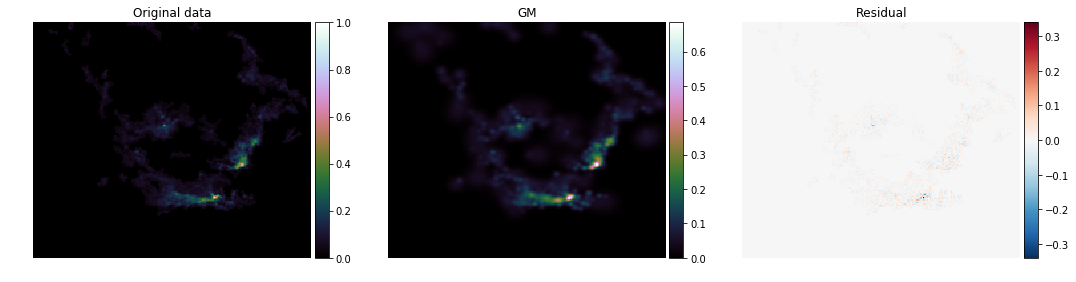

RESIDUAL STATS
RMS of residual: 0.00756534200645458
Inf norm of residual: 0.33976576712905915
Variance of residual: 5.723438150165088e-05
Normalized flux addition: 0.08439389484479477
Normalized flux lost: 0.08406978604553124


(0.00756534200645458,
 5.723438150165088e-05,
 0.08439389484479477,
 0.08406978604553124)

In [15]:
hdmc.get_residual_stats()

***

In [16]:
db = DBSCAN(eps=0.04, min_samples=5, n_jobs=-1)
points = np.vstack([hdmc.xc, hdmc.yc]).T
db.fit(points)

DBSCAN(algorithm='auto', eps=0.04, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=-1, p=None)

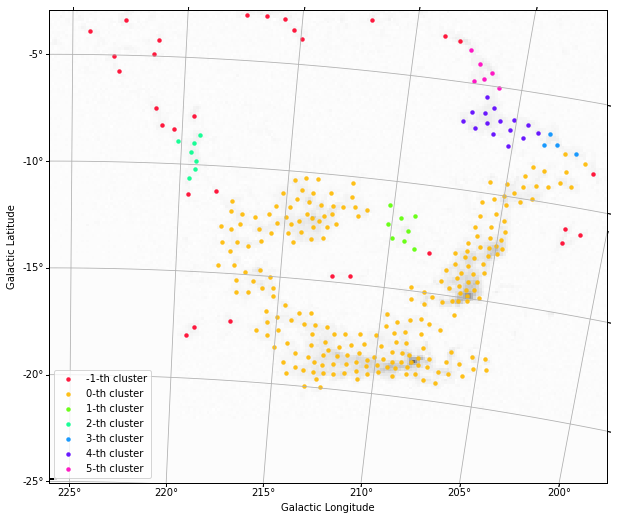

In [17]:
points_clusters(data, points, db.labels_, wcs=wcs)